# Atividade 1 de CT-236 2020 

## Instalação

pip install --user igraph

pip install --user numpy

## Imports

In [1]:
import random

import numpy as np
import igraph as ig

import matplotlib.pyplot as plt

## Funções Auxiliares

In [2]:
def binomial_builder(n, q):
    g = ig.Graph(n, directed=False)
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < q:
                g.add_edge(i, j)
    return g

def binomial_generator(i, n, q):
    idx = 0
    for _ in range(i):
        yield binomial_builder(n, q), idx
        idx += 1

## Primeiro Experimento

In [3]:
NUM_SAMPLES = 10

# 0.1, 0.2, ... , 1.9, 2.0
zs = np.arange(0.1, 2.1, 0.1)

n = 5000
# n = 1000

fraction_global = []

for z in zs:
    # Acumulador
    frac = 0.0

    # Amostrando
    for g, i in binomial_generator(NUM_SAMPLES, n, z/n):
        file_name = './images/giant/z{:.2f}_n{}_i{}.png'.format(z, n, i)

        giant = g.components().giant()

        frac += giant.vcount() / n

        layout = giant.layout("kk")
        ig.plot(giant, target=file_name, layout=layout)

    # Média dos valores amostrados
    fraction_global.append(frac / NUM_SAMPLES)


### Plot: descontinuidade em z = 1

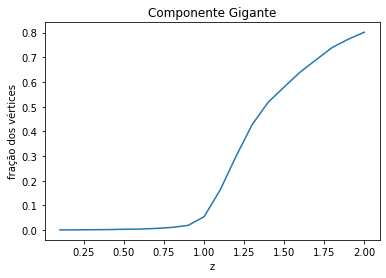

In [4]:
plt.plot(zs, fraction_global)
plt.xlabel('z')
plt.ylabel('fração dos vértices')
plt.title('Componente Gigante')
plt.savefig('./images/results/frac_comp_gigante.png')

## Segudo Experimento

In [5]:
# 2^5 -> 2^15; take 100 values
ns = np.logspace(5, 15, num=100, base=2)

z = 1.5

giant = []
second = []
third = []

for n in ns:
    n = int(n)
    for g, _ in binomial_generator(1, n, z/n):
        sizes = [graph.vcount() for graph in g.components().subgraphs()]
        sizes.sort()

        giant.append(sizes[-1])
        second.append(sizes[-2])
        third.append(sizes[-3])


### Plot: componentes (número absoluto de vértices)

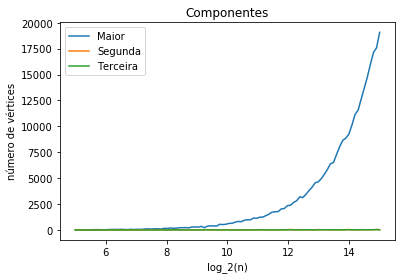

In [6]:
plt.plot(np.log2(ns), giant)
plt.plot(np.log2(ns), second)
plt.plot(np.log2(ns), third)
plt.xlabel('log_2(n)')
plt.ylabel('número de vértices')
plt.title('Componentes')
plt.legend(['Maior', 'Segunda', 'Terceira'])
plt.savefig('./images/results/components_abs.png')

### Plot: componentes (número relativo de vértices)

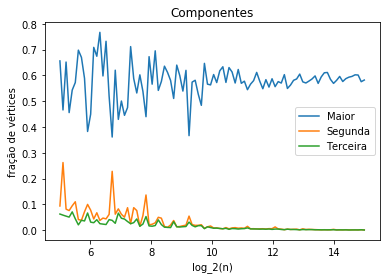

In [7]:
frac_giant = np.divide(np.array(giant), ns)
frac_second = np.divide(np.array(second), ns)
frac_third = np.divide(np.array(third), ns)

plt.plot(np.log2(ns), frac_giant)
plt.plot(np.log2(ns), frac_second)
plt.plot(np.log2(ns), frac_third)
plt.xlabel('log_2(n)')
plt.ylabel('fração de vértices')
plt.title('Componentes')
plt.legend(['Maior', 'Segunda', 'Terceira'])
plt.savefig('./images/results/components_frac.png')

## Terceiro Experimento

In [8]:
NUM_SAMPLES = 8

# 2^5 -> 2^12; take 100 values
ns = np.logspace(5, 12, num=100, base=2)

z = 1.5

diameters = []

for n in ns:
    n = int(n)
    acc = 0.0
    for g, _ in binomial_generator(NUM_SAMPLES, n, z/n):
        acc += g.diameter(directed=False)
    diameters.append(acc / NUM_SAMPLES)

### Plot: diâmetro

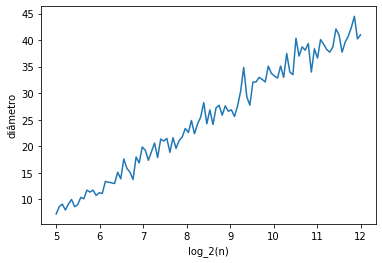

In [10]:
plt.plot(np.log2(ns), diameters)
plt.xlabel('log_2(n)')
plt.ylabel('diâmetro')
plt.savefig('./images/results/diameter.png')